<a href="https://colab.research.google.com/github/itcxx/Notebook/blob/main/Autoregressive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoregressive models
### 方法实现

Coefficients: [0.00872106 0.31519036 0.35109818 0.20141616]
Mean Squared Error: 0.1146668134870465


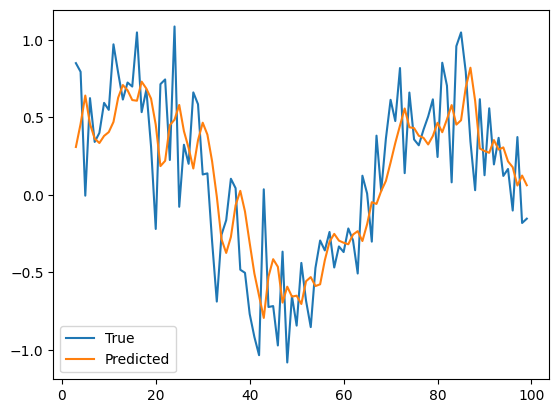

In [3]:
#掉包实现自回归模型：

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# 创建一个示例时间序列数据
np.random.seed(0)
n = 100
t = np.arange(n)
y = 0.6 * np.sin(0.1 * t) + 0.3 * np.random.normal(size=n)

# 拟合一个AR模型
lag = 3
model = AutoReg(y, lags=lag)
model_fit = model.fit()

# 输出模型参数
print('Coefficients: %s' % model_fit.params)

# 使用模型进行预测
predictions = model_fit.predict(start=lag, end=len(y)-1, dynamic=False)

# 计算模型的均方误差
mse = mean_squared_error(y[lag:], predictions)
print('Mean Squared Error: %s' % mse)

# 绘制实际值和预测值
plt.plot(t[lag:], y[lag:], label='True')
plt.plot(t[lag:], predictions, label='Predicted')
plt.legend()
plt.show()


Estimated alpha: 0.6979585822933118
Mean Squared Error: 1.7701463289313995e-06


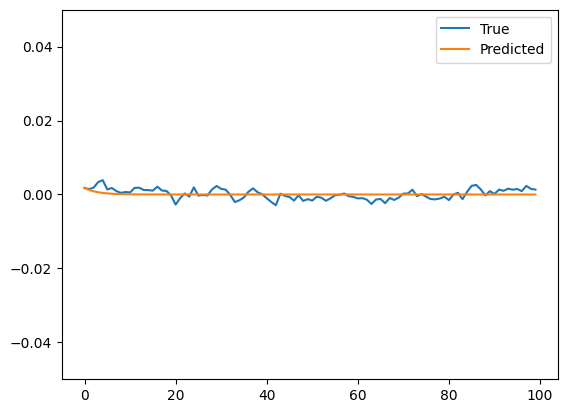

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(0)
n = 100  # 数据点数量
alpha = 0.6  # AR参数
sigma = 0.001  # 噪声标准差

# 生成AR(1)时间序列
y = np.zeros(n)
y[0] = np.random.normal(0, sigma)
for t in range(1, n):
    y[t] = alpha * y[t-1] + np.random.normal(0, sigma)
    # y[t] = alpha * y[t-1]
# print("生成真实序列：",y)

# 估计AR(1)模型参数
# 对于AR(1)模型，我们可以使用最小二乘法来估计alpha参数
X = y[:-1]
Y = y[1:]
# print("X:",X)
# print("y:",y)
alpha_est = np.sum(X * Y) / np.sum(X * X)
print(f"Estimated alpha: {alpha_est}")

# 使用估计的参数进行预测
y_pred = np.zeros(n)
y_pred[0] = y[0]
for t in range(1, n):
    y_pred[t] = alpha_est * y_pred[t-1]

# 计算均方误差
mse = np.mean((y - y_pred)**2)
print(f"Mean Squared Error: {mse}")

# 绘制实际值和预测值
plt.ylim(-0.05,0.05)
plt.plot(y, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [11]:
### 多元实现

[ 2.37434368 -2.47923177]


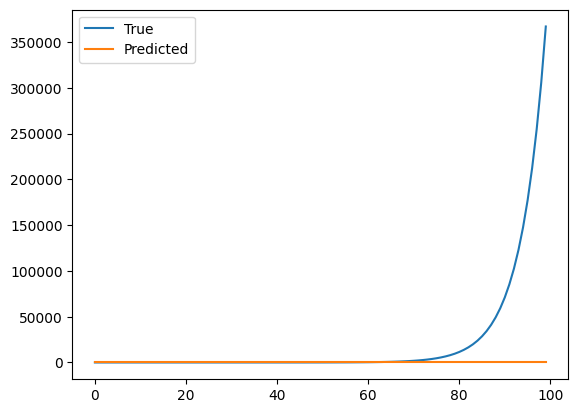

In [29]:
import numpy as np

def fit_ar_model(y, p):
    """
    手动实现的自回归模型拟合函数。
    参数：
        y: numpy 数组，表示时间序列数据。
        p: 整数，表示自回归模型的阶数。
    返回：
        coef: numpy 数组，表示模型参数。
    """
    n = len(y)

    # 构造设计矩阵 X 和响应变量向量 Y
    X = np.zeros((n - p, p))
    Y = y[p:]

    for i in range(p):
        X[:, i] = y[p - i - 1: n - i - 1]

    # 使用最小二乘法求解参数
    XT_X_inv = np.linalg.inv(np.dot(X.T, X))
    XT_Y = np.dot(X.T, Y)
    coef = np.dot(XT_X_inv, XT_Y)

    return coef

# 生成模拟数据
np.random.seed(0)
n = 100  # 数据点数量
alpha = 0.6  # AR参数
alpha_1=0.8
sigma = 0.001  # 噪声标准差

# 生成AR(1)时间序列
y = np.zeros(n)
y[0] = np.random.normal(0, sigma)
for t in range(1, n):
    y[t] = alpha * y[t-1] +alpha * y[t-1]+ np.random.normal(0, sigma)
    # y[t] = alpha * y[t-1]

# 确定模型的阶数，例如 p = 2
p = 2
# 调用 fit_ar_model 函数求解模型参数
y_pred = fit_ar_model(y, p)
print(y_pred)
y_pred_show=np.zeros(n)
for t in range(1,n):
  y_pred_show[t] = y_pred_show[t-1] * y_pred[0]+ y_pred_show[t-1]* y_pred[1]

plt.plot(y, label='True')
plt.plot(y_pred_show, label='Predicted')
plt.legend()
plt.show()


Y shape: (2, 100)
Phi shape: (2, 2, 2)
Gener y shape: (2, 100)
True Phi : [[[ 0.933779   -0.48863894]
  [ 0.47504421 -0.0756786 ]]

 [[-0.05160943  0.20529925]
  [ 0.07202179  0.72713675]]]
Estimated Phi: [[[-0.64122216  0.97878314]
  [-0.099388    0.5716342 ]]

 [[ 0.26899508  0.02081525]
  [ 0.68923845  0.0478968 ]]]


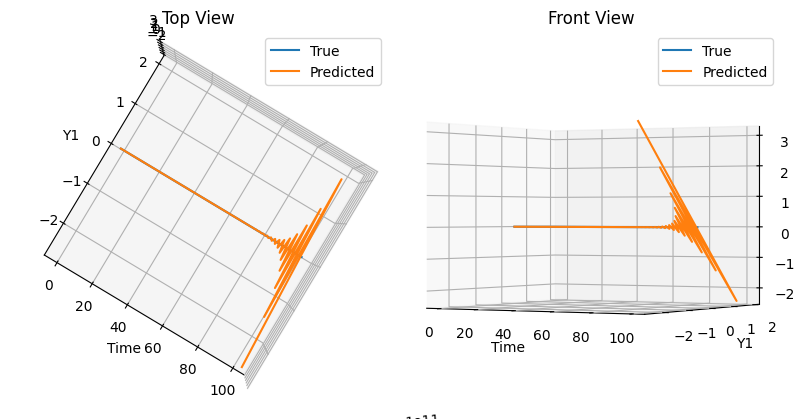

In [48]:
import numpy as np

# 生成模拟数据
np.random.seed(0)
n = 100  # 数据点数量
m = 2  # 时间序列维度
p = 2  # 模型阶数

# 初始化 Y
Y = np.zeros((m, n))
for i in range(m):
    Y[i, 0:p] = np.random.normal(0, 1, p)
print("Y shape:",Y.shape)

# 生成多元时间序列数据
Phi = np.random.normal(0, 0.5, (m, m, p))

for t in range(p, n):
    for i in range(m):
        Y[i, t] = np.sum(Phi[i, :, 0] * Y[:, t-1]) + np.sum(Phi[i, :, 1] * Y[:, t-2]) + np.random.normal(0, 1)
print("Phi shape:",Phi.shape)
print("Gener y shape:", Y.shape)
print("True Phi :", Phi)

# 构建设计矩阵和响应变量矩阵
X = np.zeros((n-p, m*p))
Y_response = Y[:, p:].T

for i in range(n-p):
    X[i, :] = Y[:, i:i+p].flatten()

# 使用最小二乘法求解参数
Phi_estimated = np.linalg.lstsq(X, Y_response, rcond=None)[0].T.reshape(m, m, p)

print("Estimated Phi:", Phi_estimated)

# 预测
Y_pred = np.zeros((m, n))
Y_pred[:, 0:p] = Y[:, 0:p]
for t in range(p, n):
    for i in range(m):
        Y_pred[i, t] = np.sum(Phi_estimated[i, :, 0] * Y_pred[:, t-1]) + np.sum(Phi_estimated[i, :, 1] * Y_pred[:, t-2])


# 创建一个2x1的子图布局
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': '3d'}, figsize=(8, 10))
t = np.arange(n)
# 第一个子图：从上往下看
ax = axs[0]
ax.plot3D(t, Y[0, :], Y[1, :], label='True')
ax.plot3D(t, Y_pred[0, :], Y_pred[1, :], label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Y1')
ax.set_zlabel('Y2')
ax.legend()
ax.view_init(elev=90)  # 设置仰角为90度
ax.set_title('Top View')

# 第二个子图：从前往后看
ax = axs[1]
ax.plot3D(t, Y[0, :], Y[1, :], label='True')
ax.plot3D(t, Y_pred[0, :], Y_pred[1, :], label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Y1')
ax.set_zlabel('Y2')
ax.legend()
ax.view_init(elev=0)  # 设置仰角为0度，从前往后看
ax.set_title('Front View')

plt.tight_layout()
plt.show()